In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import subprocess
import datetime
import re

In [6]:
home_dir = '/home/jupyter/data_science_projects/business_data_science'

data_dir = os.path.join(home_dir, 'data/external/OnlineRetail.csv')

In [10]:
# encode csv as utf-8
subprocess.getoutput(f'file -i {data_dir}')
#subprocess.getoutput('iconv -f UTF-8 -t UTF-8 OnlineRetail.csv > OnlineRetail_utf8.csv')

'/home/jupyter/data_science_projects/business_data_science/data/external/OnlineRetail.csv: application/csv; charset=us-ascii'

In [14]:
df = pd.read_csv(data_dir, encoding="unicode_escape")

In [18]:
df.shape

(541909, 8)

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [36]:
# Changing data types

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
df.InvoiceDate.describe()

/var/tmp/ipykernel_2096585/2833845678.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.InvoiceDate.describe()


count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [30]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [22]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [24]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [210]:
# Number of customers
print(f'Number of Unique Customers by CustomerID: {df.CustomerID.nunique()}')
print(f'Number of Unique Countries: {df.Country.nunique()}')
print(f'Number of Unique Invoices: {df.InvoiceNo.nunique()}')
print(f'Number of products by StockCode: {df.StockCode.nunique()}\nNumber of products by Unique Description: {df.Description.nunique()}')

Number of Unique Customers by CustomerID: 4372
Number of Unique Countries: 38
Number of Unique Invoices: 25900
Number of products by StockCode: 4070
Number of products by Unique Description: 4223


In [213]:
# Checking to make sure that each Invoice has a unique CustomerID

df.groupby('InvoiceNo').aggregate(count=('CustomerID','count')).sort_values('count', ascending=False)

,count
InvoiceNo,
576339,542
579196,533
580727,529
578270,442
573576,435
...,...
549349,0
549350,0
549351,0


#### Understanding why some invoices have a "C" in them

In [225]:
df.loc[df['InvoiceNo'].str.contains('C|c')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


### Visualizations

In [ ]:
# Copying the original dataset
vdf = df.copy()

In [66]:
# time series variables
vdf['date'] = pd.to_datetime(vdf.InvoiceDate).dt.date
vdf['year'] = pd.to_datetime(vdf.InvoiceDate).dt.year
vdf['month'] = pd.to_datetime(vdf.InvoiceDate).dt.month
vdf['day'] = pd.to_datetime(vdf.InvoiceDate).dt.day

In [112]:
# new variable

vdf['Revenue'] = vdf['Quantity'] * vdf['UnitPrice']

#### Understanding the time series

In [120]:
agg_df = vdf.groupby(['date']).agg(\
    SumQuantity = ('Quantity','sum'),\
    AvgQuantity = ('Quantity','mean'),\
    SumUnitPrice = ('UnitPrice','sum'),\
    AvgUnitPrice = ('UnitPrice','mean'),\
    SumRevenue = ('Revenue','sum'),\
    AvgRevenue = ('Revenue','mean')).reset_index()

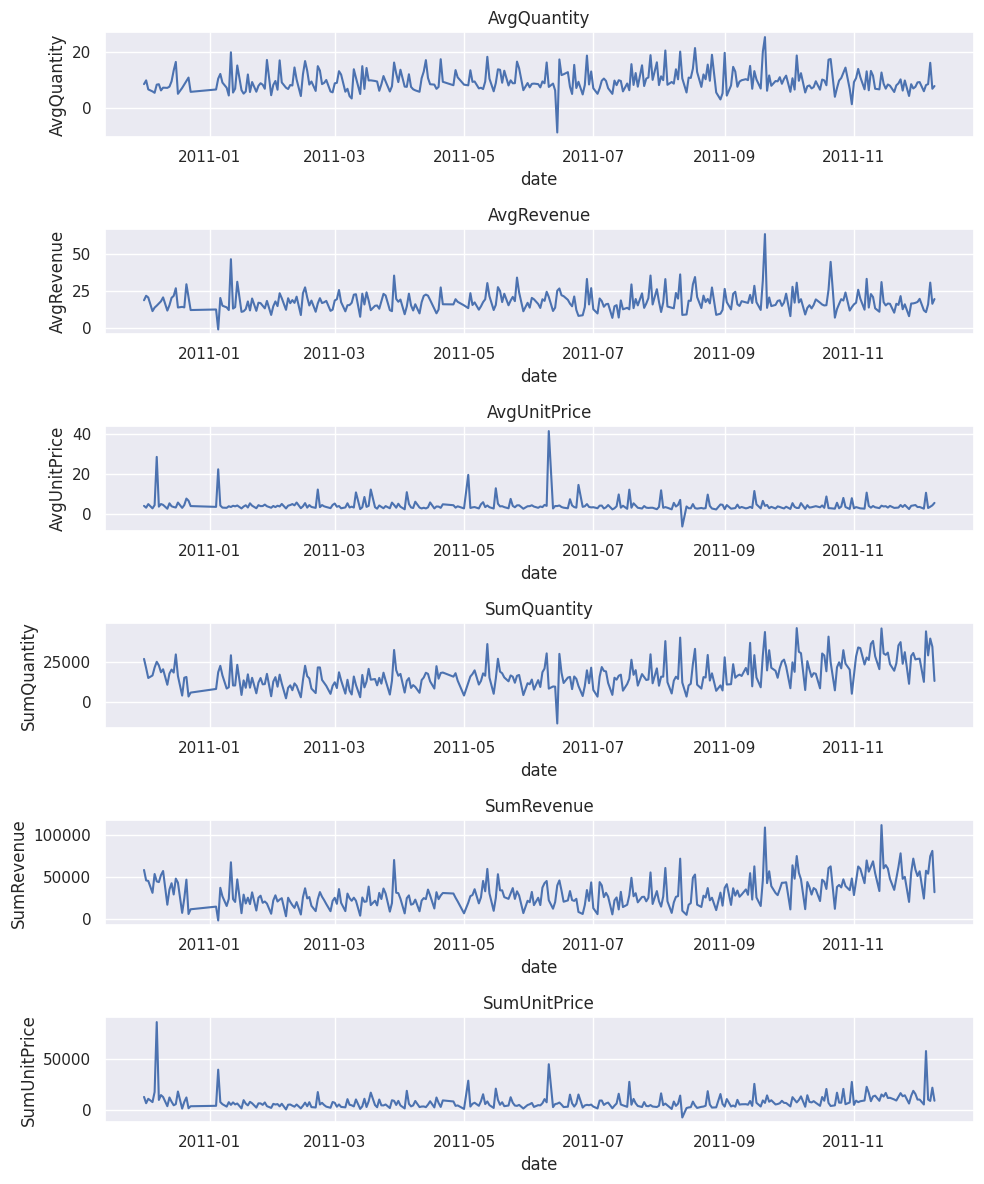

In [127]:
sns.set(rc={"figure.figsize":(10, 12)})

fig, ax = plt.subplots(6, 1, figsize=(10, 12))
for i,y in enumerate(sorted([c for c in agg_df.columns if c != 'date'])):
    sns.lineplot(data=agg_df, x='date', y=y, ax=ax[i])
    ax[i].set_title(y)
plt.tight_layout()
plt.show()


#### Grouping Country by Revenue, Quantity, and UnitPrice

In [230]:
agg_df = vdf.groupby(['Country']).agg(\
    SumQuantity = ('Quantity','sum'),\
    AvgQuantity = ('Quantity','mean'),\
    SumUnitPrice = ('UnitPrice','sum'),\
    AvgUnitPrice = ('UnitPrice','mean'),\
    SumRevenue = ('Revenue','sum'),\
    AvgRevenue = ('Revenue','mean')).reset_index()

In [239]:
for x,y in zip(agg_df['AvgRevenue'], agg_df['Country']):
    print(x, y)

108.87789515488483 Australia
25.322493765586035 Austria
28.86315789473684 Bahrain
19.773301111648138 Belgium
35.7375 Brazil
24.28066225165563 Canada
26.49906332453826 Channel Islands
20.81397106109325 Cyprus
23.590666666666667 Czech Republic
48.24714652956298 Denmark
32.12259882869693 EIRE
21.17622950819672 European Community
32.124805755395684 Finland
23.06928830197499 France
23.348942601369142 Germany
32.26383561643836 Greece
35.12861111111111 Hong Kong
23.681318681318682 Iceland
26.625656565656566 Israel
21.034259028642587 Italy
98.7168156424581 Japan
37.64177777777778 Lebanon
47.45885714285714 Lithuania
19.72811023622047 Malta
120.05969633066216 Netherlands
32.37887661141805 Norway
21.15290322580645 Poland
19.333127057274524 Portugal
17.281206896551726 RSA
13.116999999999999 Saudi Arabia
39.82703056768559 Singapore
21.624390051322543 Spain
79.21192640692641 Sweden
28.164510489510487 Switzerland
5.948178694158075 USA
27.97470588235294 United Arab Emirates
16.525065419655363 United K

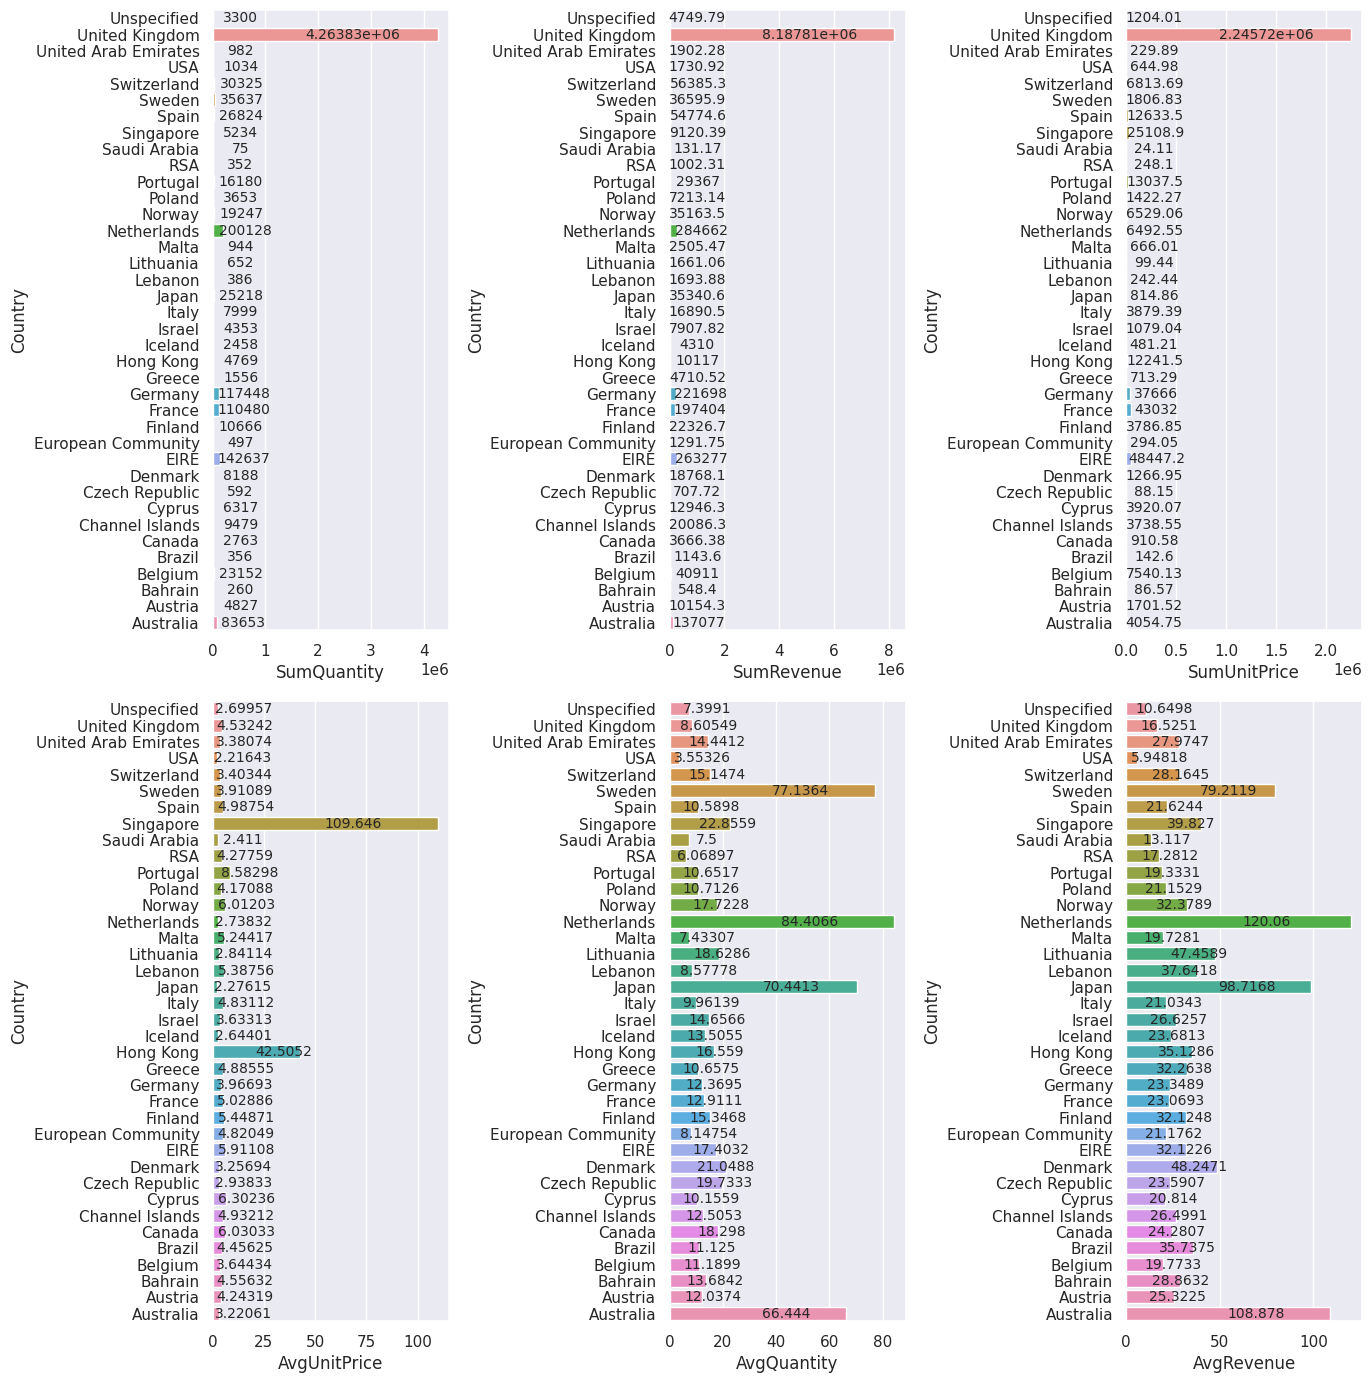

In [263]:
#sns.set(rc={"figure.figsize":(10, 12)})

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(14, 14))
ax.flatten()


for i,x in enumerate([c for c in agg_df.columns if c != 'Country']):
    r=i%rows
    c=i%cols  
    #print(x + ' ' + str(r) + ' ' + str(c))
    #print(f'j = {j}, i = {i}')
    #sns.lineplot(data=agg_df, x='date', y=y, ax=ax[i])
    axs = sns.barplot(data=agg_df.sort_values('Country', ascending=False), x=x, y='Country',ax=ax[r,c])
    #ax[r,c].set_title(x)
    
    for c in axs.containers:
        axs.bar_label(c,label_type='center', padding=20, fontsize=10)
    
plt.tight_layout()
plt.show()



#sns.barplot(data=agg_df.sort_values('AvgRevenue', ascending=False), x='AvgRevenue', y='Country')

#### Looking at the Revenue per customer by different slices

In [214]:
vdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,year,month,day,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34


In [220]:
vdf.loc[vdf['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,year,month,day,Revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,2011,1,18,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,2011,1,18,-77183.6


In [218]:
# Overall by Customer
vdf.groupby(['CustomerID']).agg(SumUnits = ('Quantity','sum'),\
                                AvgUnits = ('Quantity','mean'),\
                                
                                AvgUnitPrice = ('UnitPrice','mean'),\
                                SumRevenue = ('Revenue','sum'),\
                                AvgRevenue = ('Revenue','mean')).reset_index()

,CustomerID,SumUnits,AvgUnits,SumUnitPrice,AvgUnitPrice,SumRevenue,AvgRevenue
0,12346.0,0,0.000000,2.08,1.040000,0.00,0.000000
1,12347.0,2458,13.505495,481.21,2.644011,4310.00,23.681319
2,12348.0,2341,75.516129,178.71,5.764839,1797.24,57.975484
3,12349.0,631,8.643836,605.10,8.289041,1757.55,24.076027
4,12350.0,197,11.588235,65.30,3.841176,334.40,19.670588
...,...,...,...,...,...,...,...
4367,18280.0,45,4.500000,47.65,4.765000,180.60,18.060000
4368,18281.0,54,7.714286,39.36,5.622857,80.82,11.545714
4369,18282.0,98,7.538462,62.68,4.821538,176.60,13.584615
4370,18283.0,1397,1.847884,1220.93,1.614987,2094.88,2.771005


In [215]:
# By Month/Customer
vdf.groupby(['year','month','CustomerID']).agg(SumRevenue = ('Revenue','sum'),AvgRevenue = ('Revenue','mean')).reset_index()

,year,month,CustomerID,SumRevenue,AvgRevenue
0,2010,12,12347.0,711.79,22.960968
1,2010,12,12348.0,892.80,52.517647
2,2010,12,12370.0,1868.02,20.527692
3,2010,12,12377.0,1001.52,23.291163
4,2010,12,12383.0,600.72,16.235676
...,...,...,...,...,...
13670,2011,12,18245.0,894.25,16.259091
13671,2011,12,18272.0,367.88,15.994783
13672,2011,12,18273.0,51.00,51.000000
13673,2011,12,18282.0,77.84,15.568000


In [227]:
vdf.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'year', 'month', 'day',
       'Revenue'],
      dtype='object')